# 1. Load in Dataset

In [104]:
# Consolidated Imports
!pip install nltk
# Basic Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import nltk
from nltk.corpus import stopwords, opinion_lexicon
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Machine Learning and Modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc,
    confusion_matrix
)
from sklearn.preprocessing import MultiLabelBinarizer, label_binarize
from sklearn.preprocessing import LabelEncoder

# Sparse Matrix Operations
from scipy import sparse
from scipy.sparse import hstack, csr_matrix
from scipy.stats import pointbiserialr


In [5]:
# Replace 'path_to_your_file.csv' with the actual path of the downloaded CSV file
df = pd.read_csv('full_dataset_sentiment_directive_responses.csv')

# Display the first few records to understand its structure
print(df.head())

                                             Context  \
0  I'm going through some things with my feelings...   
1  I'm going through some things with my feelings...   
2  I'm going through some things with my feelings...   
3  I'm going through some things with my feelings...   
4  I'm going through some things with my feelings...   

                                            Response Sentiment Directive  
0  If everyone thinks you're worthless, then mayb...  Positive       Yes  
1  Hello, and thank you for your question and see...  Positive       Yes  
2  First thing I'd suggest is getting the sleep y...  Positive       Yes  
3  Therapy is essential for those that are feelin...   Neutral        No  
4  I first want to let you know that you are not ...  Positive       Yes  


# 2. Remove Stopwords

In [8]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nickreinert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nickreinert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nickreinert/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 3. Tokenization and Preprocessing

In [237]:
def clean_text(text):
    # Convert to string in case of non-string input
    text = str(text)
    # Lowercasing
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Ensure NLTK resources are available
print("Downloading NLTK resources...")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset
print("Loading dataset...")
df = pd.read_csv('train.csv')

# Applying text preprocessing
print("Cleaning 'Context' column...")
df['Cleaned_Context'] = df['Context'].astype(str).apply(clean_text)

print("Cleaning 'Response' column...")
df['Cleaned_Response'] = df['Response'].astype(str).apply(clean_text)

print("Preprocessing complete!")

Loading dataset...
Cleaning 'Context' column...


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nickreinert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nickreinert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nickreinert/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaning 'Response' column...
Preprocessing complete!


In [239]:
# Applying text preprocessing to both 'Context' and 'Response' columns
df['Cleaned_Context'] = df['Context'].apply(clean_text)
df['Cleaned_Response'] = df['Response'].apply(clean_text)

# Display a few random rows before preprocessing for comparison
print(df[['Context', 'Response']].sample(5))

# Assuming 'Cleaned_Context' and 'Cleaned_Response' are your preprocessed columns
# Display the same rows after preprocessing to see the changes
print(df[['Cleaned_Context', 'Cleaned_Response']].sample(5))

                                                Context  \
145   I'm in my mid 20s with a husband and children....   
793   I'm in my early 20s. I’ve been married once, a...   
2394  I have lately been having lots of anxiety and ...   
266   I am not sure if I am depressed. I don't know ...   
3319  I'm always listening to my husband, but it fee...   

                                               Response  
145   It sound like there are some parts of your lif...  
793   Sounds as though you're taking the blame for t...  
2394  It is very hard to want a loving relationship,...  
266   I am so sorry you are struggling!  I do think ...  
3319  Does your husband want to listen to you?Find t...  
                                        Cleaned_Context  \
2514  ive got much anger dont know control girlfrien...   
596   daughter stressed silly thing school start cry...   
2078  ive gone couple therapy session far still ever...   
1806  therapist gay sexual issue however therapist s...   
33

# 4. Feature Extraction (Vectorization)

In [241]:
# 4. Feature Extraction (Vectorization)

# BoW for Context
print("Extracting Bag-of-Words features for 'Context'...")
count_vectorizer_context = CountVectorizer()
bow_features_context = count_vectorizer_context.fit_transform(df['Context'])

# TF–IDF for Context
print("Extracting TF-IDF features for 'Context'...")
tfidf_vectorizer_context = TfidfVectorizer()
tfidf_features_context = tfidf_vectorizer_context.fit_transform(df['Context'])

# BoW for Response
print("Extracting Bag-of-Words features for 'Response'...")
count_vectorizer_response = CountVectorizer()
bow_features_response = count_vectorizer_response.fit_transform(df['Response'].fillna(''))  # Handling NaNs

# TF–IDF for Response
print("Extracting TF-IDF features for 'Response'...")
tfidf_vectorizer_response = TfidfVectorizer()
tfidf_features_response = tfidf_vectorizer_response.fit_transform(df['Response'].fillna(''))  # Handling NaNs

# Get feature names
print("Retrieving feature names...")
feature_names_bow_context = count_vectorizer_context.get_feature_names_out()
feature_names_tfidf_context = tfidf_vectorizer_context.get_feature_names_out()
feature_names_bow_response = count_vectorizer_response.get_feature_names_out()
feature_names_tfidf_response = tfidf_vectorizer_response.get_feature_names_out()

# Convert feature names to DataFrames and save
print("Saving feature names to CSV files...")
bow_response_df = pd.DataFrame(feature_names_bow_response, columns=['Bow_Features_Response'])
tfidf_response_df = pd.DataFrame(feature_names_tfidf_response, columns=['Tfidf_Features_Response'])

bow_response_df.to_csv('bow_response_features.csv', index=False)
tfidf_response_df.to_csv('tfidf_response_features.csv', index=False)

print("Feature extraction and export complete.")


Extracting Bag-of-Words features for 'Context'...
Extracting TF-IDF features for 'Context'...
Extracting Bag-of-Words features for 'Response'...
Extracting TF-IDF features for 'Response'...
Retrieving feature names...
Saving feature names to CSV files...
Feature extraction and export complete.


# 5. Feature Engineering 

In [243]:
# Load your dataset
df = pd.read_csv('full_dataset_sentiment_directive_responses-Copy1.csv')  # Adjust the path as necessary

# Ensure NLTK resources are available
nltk.download('opinion_lexicon')

# Load positive and negative words from NLTK's opinion lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Define your directive keywords based on your analysis
directive_keywords = ['try', 'suggest', 'recommend', 'advise', 'consider', 'encourage', 'plan', 'recommend']

# Function to classify sentiment based on positive and negative words
def classify_sentiment(text):
    text = str(text).lower().split()
    positive_score = sum(word in positive_words for word in text)
    negative_score = sum(word in negative_words for word in text)
    
    if positive_score > negative_score:
        return 'Positive'
    elif negative_score > positive_score:
        return 'Negative'
    else:
        return 'Neutral'

# Adjusted function to check for the presence of directive keywords and return a boolean
def is_directive(text):
    text = str(text).lower()
    return any(word in text for word in directive_keywords)

# Apply the classification functions to the dataset
df['Sentiment'] = df['Response'].apply(classify_sentiment)
df['Directive'] = df['Response'].apply(is_directive)  # Directly update the 'Directive' column to return boolean

# Confirm the changes with the first few rows of the DataFrame
print(df.head())

# Save the updated DataFrame to a new CSV file
df.to_csv('full_dataset_sentiment_directive_responses-Copy1.csv', index=False)


                                             Context  \
0  I'm going through some things with my feelings...   
1  I'm going through some things with my feelings...   
2  I'm going through some things with my feelings...   
3  I'm going through some things with my feelings...   
4  I'm going through some things with my feelings...   

                                            Response Sentiment  Directive  \
0  If everyone thinks you're worthless, then mayb...  Positive       True   
1  Hello, and thank you for your question and see...  Positive       True   
2  First thing I'd suggest is getting the sleep y...  Positive       True   
3  Therapy is essential for those that are feelin...   Neutral      False   
4  I first want to let you know that you are not ...  Positive       True   

   verb_count  adj_count  contains_advisory  contains_affirmative  
0          33         19              False                  True  
1          75         27               True                  Tru

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/nickreinert/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [18]:
# Count the instances of each sentiment category in the 'Sentiment' column
sentiment_counts = df['Sentiment'].value_counts()

# Display the count of each sentiment
print("Sentiment Distribution in the Dataset:")
print(sentiment_counts)

# Alternatively, for a more detailed breakdown including percentages:
print("\nDetailed Sentiment Distribution (with percentages):")
print(sentiment_counts / len(df) * 100)


Sentiment Distribution in the Dataset:
Sentiment
Positive    2297
Negative     838
Neutral      377
Name: count, dtype: int64

Detailed Sentiment Distribution (with percentages):
Sentiment
Positive    65.404328
Negative    23.861048
Neutral     10.734624
Name: count, dtype: float64


In [20]:
# Assuming 'df' is your DataFrame and the 'Sentiment' column has already been populated

# Count the instances of each sentiment category in the 'Sentiment' column
sentiment_counts = df['Sentiment'].value_counts()

# Calculate percentages
sentiment_percentages = df['Sentiment'].value_counts(normalize=True) * 100

# Convert the Series objects into a DataFrame for a nicer display
sentiment_summary_df = pd.DataFrame({
    'Sentiment': sentiment_counts.index,
    'Count': sentiment_counts.values,
    'Percentage': sentiment_percentages.values
})

# Format the 'Percentage' column to show up to 2 decimal places
sentiment_summary_df['Percentage'] = sentiment_summary_df['Percentage'].map('{:,.2f}%'.format)

# Display the DataFrame
sentiment_summary_df



,Sentiment,Count,Percentage
0,Positive,2297,65.40%
1,Negative,838,23.86%
2,Neutral,377,10.73%


In [245]:
# run code on own created gold standard

# Ensure NLTK resources are available
print("Downloading opinion lexicon from NLTK (if not already available)...")
nltk.download('opinion_lexicon')

# Load your dataset
print("Loading dataset...")
df = pd.read_csv('full_dataset_sentiment_directive_responses.csv')  # Use correct path

# Load positive and negative words from NLTK's opinion lexicon
print("Loading positive and negative word sets from opinion lexicon...")
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Define your directive keywords
directive_keywords = ['try', 'suggest', 'recommend', 'advise', 'consider', 'encourage', 'plan', 'recommend']

# Define your classification functions
# Ensure classify_sentiment and is_directive are defined above this block

# Sample a new subset
print("Sampling 1000 random rows from the dataset...")
new_sampled_df = df.sample(n=1000)

# Apply classification functions
print("Applying sentiment and directive classification...")
new_sampled_df['Sentiment'] = new_sampled_df['Response'].apply(classify_sentiment)
new_sampled_df['Directive'] = new_sampled_df['Response'].apply(is_directive)

# Save to CSV
print("Saving new sample with predictions to CSV...")
new_sampled_df.to_csv('new_sampled_predictions.csv', index=False)

print("✅ Classification complete and file saved as 'new_sampled_predictions.csv'.")

Loading dataset...
Loading positive and negative word sets from opinion lexicon...
Sampling 1000 random rows from the dataset...
Applying sentiment and directive classification...
Saving new sample with predictions to CSV...
✅ Classification complete and file saved as 'new_sampled_predictions.csv'.


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/nickreinert/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


## 5.1 Advanced Feature Engineering - POS Tagging

In [249]:
# Function to count verbs and adjectives in a text using NLTK
def count_verbs_adjectives_nltk(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    verb_count = sum(1 for word, tag in tagged if tag.startswith('VB'))
    adj_count = sum(1 for word, tag in tagged if tag.startswith('JJ'))
    return verb_count, adj_count
import pandas as pd

# Assuming df is your DataFrame and 'Response' contains the text data
# Make sure to fill NaN values
df['Response'] = df['Response'].fillna('')

# Apply the function to each response
df[['verb_count', 'adj_count']] = df['Response'].apply(
    lambda x: pd.Series(count_verbs_adjectives_nltk(x))
)
df.to_csv('full_dataset_sentiment_directive_responses-Copy1.csv', index=False)
df.head()

,Context,Response,Sentiment,Directive,verb_count,adj_count
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",Positive,Yes,33,19
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",Positive,Yes,75,27
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,Positive,Yes,18,2
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,Neutral,No,30,7
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...,Positive,Yes,15,3


## 5.2 Feature Engineering - Tone Labeling

In [251]:
# Load your dataset
df = pd.read_csv('full_dataset_sentiment_directive_responses-Copy1.csv')

# Make sure all responses are strings and handle NaN values
df['Response'] = df['Response'].fillna('').astype(str)

# Define advisory and affirmative keywords
advisory_keywords = [
    'suggest', 'consider', 'explore', 'reflect', 'think about',
    'examine', 'notice', 'question', 'imagine', 'might', 'could',
    'perhaps', 'explore the possibility', 'it might be helpful to', 'have you thought about'
]

affirmative_keywords = [
    'understand', 'valid', 'important', 'heard', 'acknowledge',
    'agree', 'accept', 'proud', 'appreciate', 'right', 'it makes sense',
    'you\'re not alone', 'that\'s a good point', 'I see what you mean', 'it\'s understandable that'
]

# Function to check for the presence of keywords in the 'Response' column
def contains_keywords(text, keywords):
    # Ensure text is a string and lowercased
    text = text.lower()
    return any(keyword in text for keyword in keywords)

# Apply the functions to check for advisory and affirmative keywords
df['contains_advisory'] = df['Response'].apply(lambda x: contains_keywords(x, advisory_keywords))
df['contains_affirmative'] = df['Response'].apply(lambda x: contains_keywords(x, affirmative_keywords))

# Now, save the updated DataFrame back to a CSV file
df.to_csv('full_dataset_sentiment_directive_responses-Copy1.csv', index=False)
df.head()

,Context,Response,Sentiment,Directive,verb_count,adj_count,contains_advisory,contains_affirmative
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",Positive,Yes,33,19,False,True
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",Positive,Yes,75,27,True,True
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,Positive,Yes,18,2,True,False
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,Neutral,No,30,7,False,False
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...,Positive,Yes,15,3,False,False


In [32]:
# Define your keywords lists for advisory and affirmative language
advisory_keywords = [
    'suggest', 'consider', 'explore', 'reflect', 'think about',
    'examine', 'notice', 'question', 'imagine', 'might', 'could',
    'perhaps', 'explore the possibility', 'it might be helpful to', 'have you thought about'
]

affirmative_keywords = [
    'understand', 'valid', 'important', 'heard', 'acknowledge',
    'agree', 'accept', 'proud', 'appreciate', 'right', 'it makes sense',
    'you\'re not alone', 'that\'s a good point', 'I see what you mean', 'it\'s understandable that'
]

# Function to check for the presence of keywords
def contains_keywords(text, keywords):
    text = text.lower()
    return any(keyword in text for keyword in keywords)

# Apply the functions to each response in the 'Response' column
df['contains_advisory'] = df['Response'].apply(lambda x: contains_keywords(x, advisory_keywords))
df['contains_affirmative'] = df['Response'].apply(lambda x: contains_keywords(x, affirmative_keywords))

# Calculate the overall counts
advisory_count = df['contains_advisory'].sum()
affirmative_count = df['contains_affirmative'].sum()

print(f"Total responses containing advisory language: {advisory_count}")
print(f"Total responses containing affirmative language: {affirmative_count}")


Total responses containing advisory language: 2258
Total responses containing affirmative language: 1979


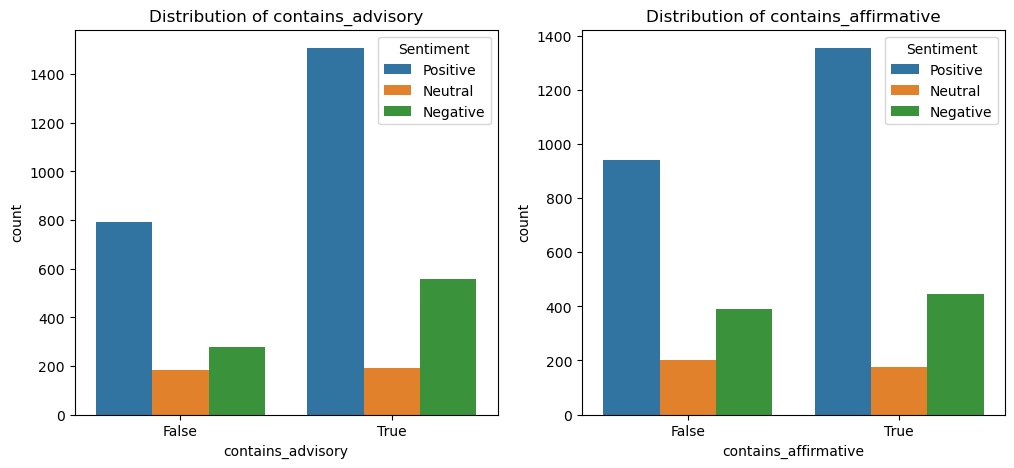

In [34]:
# Plot the distribution of 'contains_advisory' and 'contains_affirmative' features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='contains_advisory', data=df, hue='Sentiment')
plt.title('Distribution of contains_advisory')

plt.subplot(1, 2, 2)
sns.countplot(x='contains_affirmative', data=df, hue='Sentiment')
plt.title('Distribution of contains_affirmative')

plt.show()



# 6. Correlation Matrix and Gold Standard Creation

In [219]:

# Example data (replace with your actual DataFrame)
df = pd.read_csv('full_dataset_sentiment_directive_responses-Copy1.csv')  # Or however you're loading your data

# Convert 'Directive' from 'Yes'/'No' to numeric 1/0
df['Directive'] = df['Directive'].map({'Yes': 1, 'No': 0})

# Filter relevant numeric columns
selected_columns = ['contains_advisory', 'Directive', 'contains_affirmative']
filtered_df = df[selected_columns]

# Compute correlation matrix
correlation_matrix = filtered_df.corr()

# Style and display
styled_matrix = correlation_matrix.style \
    .background_gradient(cmap='coolwarm') \
    .format("{:.3f}") \
    .set_properties(**{'font-size': '12pt', 'font-family': 'Calibri'}) \
    .set_caption("Correlation Matrix: Advisory, Directive, Affirmative") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', 'black'), ('font-size', '16pt'), ('font-weight', 'bold')]
    }])

display(styled_matrix)




,contains_advisory,Directive,contains_affirmative
contains_advisory,1.000,0.317,0.134
Directive,0.317,1.000,0.120
contains_affirmative,0.134,0.120,1.000


# 7. Vader Sentiment Analysis

In [54]:
# Ensure that you have the VADER lexicon downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Load your CSV file
df = pd.read_csv('full_dataset_sentiment_directive_responses.csv')  # Replace with the path to your CSV file

# Ensure all responses are strings and not NaNs
# If the column has a different name, replace 'Response' with the actual column name
df['Response'] = df['Response'].astype(str)

# Apply VADER sentiment analysis to each response
df['sentiments'] = df['Response'].apply(lambda response: sid.polarity_scores(response))

# Break down the sentiment scores into separate columns
df['negative'] = df['sentiments'].apply(lambda x: x['neg'])
df['neutral'] = df['sentiments'].apply(lambda x: x['neu'])
df['positive'] = df['sentiments'].apply(lambda x: x['pos'])
df['compound'] = df['sentiments'].apply(lambda x: x['compound'])

# Now let's see the first few rows to confirm it worked
df.head(10)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nickreinert/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Context,Response,Sentiment,Directive,sentiments,negative,neutral,positive,compound
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",Positive,Yes,"{'neg': 0.096, 'neu': 0.786, 'pos': 0.118, 'co...",0.096,0.786,0.118,0.4951
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",Positive,Yes,"{'neg': 0.075, 'neu': 0.808, 'pos': 0.118, 'co...",0.075,0.808,0.118,0.8881
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,Positive,Yes,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.000,0.833,0.167,0.8689
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,Neutral,No,"{'neg': 0.124, 'neu': 0.741, 'pos': 0.135, 'co...",0.124,0.741,0.135,-0.3182
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...,Positive,Yes,"{'neg': 0.0, 'neu': 0.91, 'pos': 0.09, 'compou...",0.000,0.910,0.090,0.5775
5,I'm going through some things with my feelings...,"Heck, sure thing, hun!Feelings of 'depression'...",Positive,No,"{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...",0.000,0.772,0.228,0.9039
6,I'm going through some things with my feelings...,You are exhibiting some specific traits of a p...,Positive,No,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.000,0.746,0.254,0.8718
7,I'm going through some things with my feelings...,That is intense. Depression is a liar. Sometim...,Negative,No,"{'neg': 0.16, 'neu': 0.698, 'pos': 0.142, 'com...",0.160,0.698,0.142,-0.7989
8,I'm going through some things with my feelings...,It sounds like you may be putting yourself las...,Negative,No,"{'neg': 0.141, 'neu': 0.736, 'pos': 0.123, 'co...",0.141,0.736,0.123,-0.6679
9,I'm going through some things with my feelings...,It must be really difficult to experience what...,Positive,Yes,"{'neg': 0.095, 'neu': 0.679, 'pos': 0.225, 'co...",0.095,0.679,0.225,0.9705


In [257]:
# Ensure that you have the VADER lexicon downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Load your full dataset from CSV
df = pd.read_csv('full_dataset_sentiment_directive_responses.csv')  # Replace with the path to your CSV file

# Ensure all text data in the 'Response' column is treated as a string
df['Response'] = df['Response'].astype(str)

# Apply VADER sentiment analysis to each response in the DataFrame
df['sentiments'] = df['Response'].apply(lambda response: sid.polarity_scores(response))

# Break down the sentiment scores into separate columns
df['negative'] = df['sentiments'].apply(lambda x: x['neg'])
df['neutral'] = df['sentiments'].apply(lambda x: x['neu'])
df['positive'] = df['sentiments'].apply(lambda x: x['pos'])
df['compound'] = df['sentiments'].apply(lambda x: x['compound'])

# Save the DataFrame with the new sentiment scores
df.to_csv('path_to_your_enriched_dataset.csv', index=False)  # Replace with your desired output file path
df.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nickreinert/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Context,Response,Sentiment,Directive,sentiments,negative,neutral,positive,compound
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",Positive,Yes,"{'neg': 0.096, 'neu': 0.786, 'pos': 0.118, 'co...",0.0960,0.7860,0.1180,0.4951
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",Positive,Yes,"{'neg': 0.075, 'neu': 0.808, 'pos': 0.118, 'co...",0.0750,0.8080,0.1180,0.8881
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,Positive,Yes,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.0000,0.8330,0.1670,0.8689
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,Neutral,No,"{'neg': 0.124, 'neu': 0.741, 'pos': 0.135, 'co...",0.1240,0.7410,0.1350,-0.3182
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...,Positive,Yes,"{'neg': 0.0, 'neu': 0.91, 'pos': 0.09, 'compou...",0.0000,0.9100,0.0900,0.5775


In [58]:
# Load the dataset with VADER scores and gold standard labels
df = pd.read_csv('path_to_your_enriched_dataset.csv')  # Replace with your file path

# Function to categorize compound scores
def categorize_compound(compound_score, pos_threshold=0.05, neg_threshold=-0.05):
    if compound_score >= pos_threshold:
        return 'Positive'
    elif compound_score <= neg_threshold:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to categorize each compound score
df['vader_sentiment'] = df['compound'].apply(categorize_compound)

# Compare with the gold standard
# Replace 'Gold_Standard_Sentiment' with your actual column name for the gold standard sentiment
df['match'] = df['vader_sentiment'] == df['Sentiment']

# Calculate the accuracy
accuracy = df['match'].sum() / len(df)

# Output the accuracy
print(f"VADER Sentiment Accuracy compared to Gold Standard: {accuracy:.2%}")

# Save the updated DataFrame back to the same CSV file
df.to_csv('path_to_your_enriched_dataset.csv', index=False)  # Replace with your file path

VADER Sentiment Accuracy compared to Gold Standard: 73.46%


## 7.1 ROC Curve Analysis - VADER Compound vs Directive Label



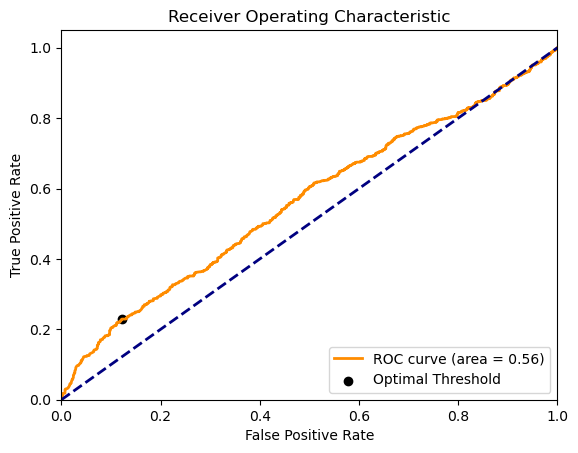

Optimal threshold for compound score is: 0.9767


In [60]:
# Load your data
df = pd.read_csv('path_to_your_enriched_dataset.csv')  # Replace with the path to your CSV file

# Convert the 'Directive' column to numerical values
df['Directive_Binary'] = df['Directive'].map({'Yes': 1, 'No': 0})

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(df['Directive_Binary'], df['compound'])

# Calculate the AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold (Youden's J statistic)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f'Optimal threshold for compound score is: {optimal_threshold}')


## 7.2  Correlation and Logistic Regression Diagnostics


In [63]:
# Assuming your 'Directive' column is already binary (1 for 'Yes', 0 for 'No')
# Calculate the point-biserial correlation
correlation, p_value = pointbiserialr(df['Directive_Binary'], df['compound'])

print(f"Point-Biserial Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Point-Biserial Correlation coefficient: 0.0480901447028229
P-value: 0.0043642437013596035


In [65]:
# Prepare the variables
X = df[['compound']]  # Predictor
y = df['Directive_Binary']  # Binary outcome

# Perform logistic regression
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Odds ratio
odds_ratio = np.exp(log_reg.coef_[0])

print(f"Odds ratio for compound score: {odds_ratio}")


Odds ratio for compound score: [1.1612714]


# 8. Machine Learning - Sentiment Classifcation

In [68]:
# Assuming 'tfidf_features_response' is your feature set and 'Sentiment' is your label
X = tfidf_features_response  # Your features
y = df['Sentiment'].values  # Your labels

# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.83      0.86      0.84       164
     Neutral       0.74      0.72      0.73        64
    Positive       0.93      0.92      0.93       475

    accuracy                           0.89       703
   macro avg       0.83      0.83      0.83       703
weighted avg       0.89      0.89      0.89       703



## 8.1 Decision Tree with TF-IDF

In [73]:
# Load the DataFrame
df = pd.read_csv('full_dataset_sentiment_directive_responses-Copy1.csv')

# Ensure 'Directive', 'contains_advisory', 'contains_affirmative' are numeric (0/1)
if df['Directive'].dtype == 'O':
    df['Directive'] = df['Directive'].map({'Yes': 1, 'No': 0})
df['Directive'] = df['Directive'].astype(int)
df['contains_advisory'] = df['contains_advisory'].astype(int)
df['contains_affirmative'] = df['contains_affirmative'].astype(int)

# Convert additional features to sparse format
additional_features = df[['Directive','contains_advisory', 'contains_affirmative']].values
additional_features_sparse = sparse.csr_matrix(additional_features)

# Combine TF-IDF features with additional features
# Assuming tfidf_features_response has already been created in your session
X_combined = hstack([tfidf_features_response, additional_features_sparse])

# Define target variable
y = df['Sentiment'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Optional: View as a styled DataFrame
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Pretty display
pd.options.display.float_format = '{:,.4f}'.format
print(report_df)

              precision    recall  f1-score   support

    Negative       0.86      0.84      0.85       164
     Neutral       0.78      0.72      0.75        64
    Positive       0.93      0.94      0.93       475

    accuracy                           0.90       703
   macro avg       0.85      0.83      0.84       703
weighted avg       0.90      0.90      0.90       703

              precision  recall  f1-score  support
Negative         0.8571  0.8415    0.8492 164.0000
Neutral          0.7797  0.7188    0.7480  64.0000
Positive         0.9255  0.9411    0.9332 475.0000
accuracy         0.8976  0.8976    0.8976   0.8976
macro avg        0.8541  0.8338    0.8435 703.0000
weighted avg     0.8963  0.8976    0.8967 703.0000


## 8.2 Model Interpretation - Feature Importance

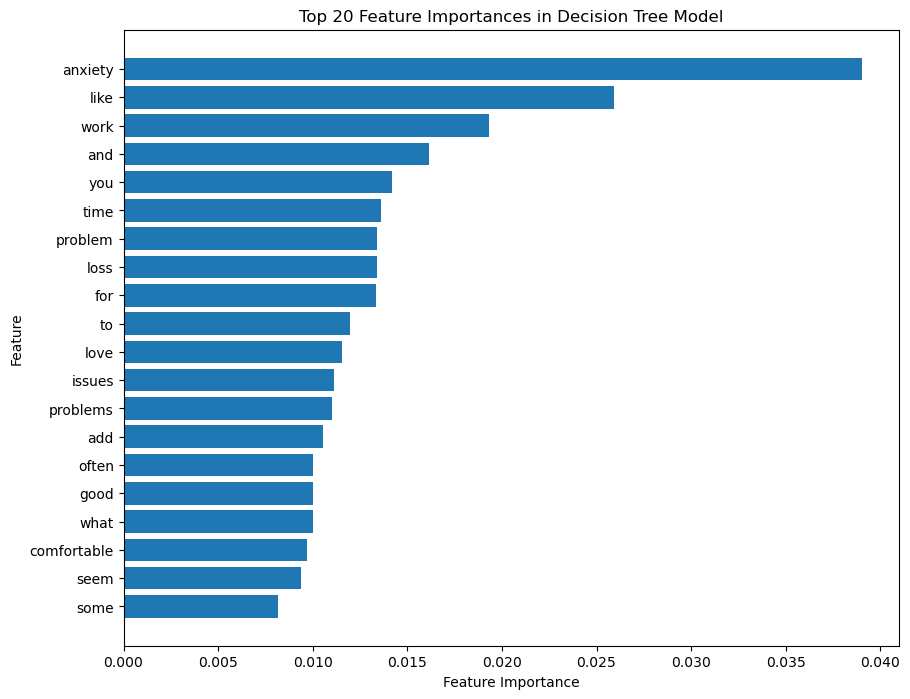

In [78]:
# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Adjusted to use 'tfidf_vectorizer_response' for consistency with your earlier code
feature_names = np.array(tfidf_vectorizer_response.get_feature_names_out().tolist() + ['contains_advisory', 'contains_affirmative'])

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

top_n = 20
sorted_idx_top = sorted_idx[:top_n]

plt.figure(figsize=(10, 8))
plt.barh(range(top_n), feature_importances[sorted_idx_top], align='center')
plt.yticks(range(top_n), feature_names[sorted_idx_top])
plt.gca().invert_yaxis()  # Top feature at the top
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances in Decision Tree Model')
plt.show()


## 8.3 Naive Bayes Classifier and ROC Curve

In [81]:
# Load the CSV file into a DataFrame
df = pd.read_csv('full_dataset_sentiment_directive_responses.csv')

# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Assuming 'X' contains your features and 'y' contains your labels
X = df.drop(columns=['Sentiment'])  # Your features
y = df['Sentiment']  # Your labels

# Check the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Remove extra rows from X and y if needed
# For example, if there are more rows in X than in y
if X.shape[0] > y.shape[0]:
    X = X.iloc[:y.shape[0], :]  # Keep only the first 'n' rows in X

# Now X and y should have the same number of samples
print("Updated shape of X:", X.shape)
print("Updated shape of y:", y.shape)

# Proceed with feature extraction and model training


Shape of the DataFrame: (3512, 4)
Shape of X: (3512, 3)
Shape of y: (3512,)
Updated shape of X: (3512, 3)
Updated shape of y: (3512,)


In [83]:
df = pd.read_csv('full_dataset_sentiment_directive_responses.csv')
# Assuming 'tfidf_features_response' is your TF-IDF feature set and 'Sentiment' is your label
X_tfidf = tfidf_features_response  # Your TF-IDF features
y_tfidf = df['Sentiment'].values  # Your labels

# Ensure X_tfidf and y_tfidf have the same number of samples
print("Shape of X_tfidf:", X_tfidf.shape)
print("Shape of y_tfidf:", y_tfidf.shape)

# Splitting dataset into training and testing for TF-IDF
X_tfidf = X_tfidf[:3508]  # Ensure consistency
y_tfidf = y_tfidf[:3508]  # Ensure consistency

# Verify shapes after slicing
print("Updated shape of X_tfidf:", X_tfidf.shape)
print("Updated shape of y_tfidf:", y_tfidf.shape)

# Splitting dataset into training and testing for TF-IDF
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes Classifier for TF-IDF
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Predict on the test set for TF-IDF
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)

# Print classification report for TF-IDF
print("Naive Bayes Classifier Performance with TF-IDF:")
print(classification_report(y_test_tfidf, y_pred_tfidf))



Shape of X_tfidf: (3512, 14465)
Shape of y_tfidf: (3512,)
Updated shape of X_tfidf: (3508, 14465)
Updated shape of y_tfidf: (3508,)
Naive Bayes Classifier Performance with TF-IDF:
              precision    recall  f1-score   support

    Negative       1.00      0.01      0.01       150
     Neutral       1.00      0.03      0.06        60
    Positive       0.70      1.00      0.83       492

    accuracy                           0.71       702
   macro avg       0.90      0.35      0.30       702
weighted avg       0.79      0.71      0.59       702



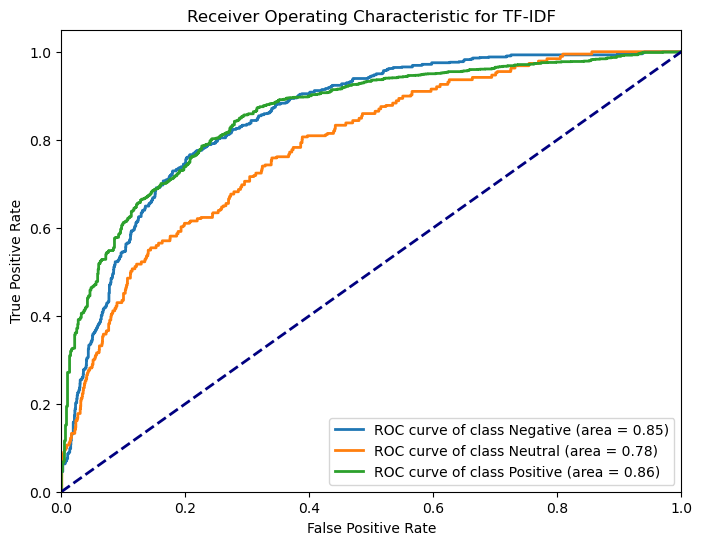

AUC: {0: 0.8511740386966867, 1: 0.7844495492408378, 2: 0.8566611307287552}


In [85]:
# Get the probability scores for each class
y_prob_tfidf = nb_classifier_tfidf.predict_proba(tfidf_features_response)

# Calculate the ROC curve and AUC score for each class
fpr_tfidf = dict()
tpr_tfidf = dict()
roc_auc_tfidf = dict()
for i in range(len(nb_classifier_tfidf.classes_)):
    fpr_tfidf[i], tpr_tfidf[i], _ = roc_curve((df['Sentiment'].values == nb_classifier_tfidf.classes_[i]).astype(int), y_prob_tfidf[:, i])
    roc_auc_tfidf[i] = auc(fpr_tfidf[i], tpr_tfidf[i])

# Plot the ROC curve for TF-IDF
plt.figure(figsize=(8, 6))
for i in range(len(nb_classifier_tfidf.classes_)):
    plt.plot(fpr_tfidf[i], tpr_tfidf[i], lw=2, label='ROC curve of class {} (area = {:0.2f})'.format(nb_classifier_tfidf.classes_[i], roc_auc_tfidf[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for TF-IDF')
plt.legend(loc="lower right")
plt.show()

# Print the AUC score
print('AUC:', roc_auc_tfidf)






### 8.3.1 Naive Bayes with BoW and ROC

In [88]:
# Load the dataset
df = pd.read_csv('full_dataset_sentiment_directive_responses.csv')

# Assuming 'Response' is the column containing the response text
response_text = df['Response'].fillna('')  # Handling potential NaNs

# Initialize the CountVectorizer to create the Bag of Words representation
count_vectorizer_response = CountVectorizer()
X_bow_response = count_vectorizer_response.fit_transform(response_text)
y_bow_response = df['Sentiment']

# Splitting dataset into training and testing for Bag of Words
X_train_bow_response, X_test_bow_response, y_train_bow_response, y_test_bow_response = train_test_split(X_bow_response, y_bow_response, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes Classifier for Bag of Words
nb_classifier_bow_response = MultinomialNB()
nb_classifier_bow_response.fit(X_train_bow_response, y_train_bow_response)

# Predict on the test set for Bag of Words
y_pred_bow_response = nb_classifier_bow_response.predict(X_test_bow_response)

# Print classification report for Bag of Words
print("Naive Bayes Classifier Performance with Bag of Words for Response:")
print(classification_report(y_test_bow_response, y_pred_bow_response))


Naive Bayes Classifier Performance with Bag of Words for Response:
              precision    recall  f1-score   support

    Negative       0.79      0.71      0.75       164
     Neutral       0.54      0.11      0.18        64
    Positive       0.83      0.95      0.89       475

    accuracy                           0.82       703
   macro avg       0.72      0.59      0.61       703
weighted avg       0.80      0.82      0.79       703



In [90]:
# Assuming y_bow_response is your array of labels
print("Unique labels:", np.unique(y_bow_response))
print("Data type:", y_bow_response.dtype)


Unique labels: ['Negative' 'Neutral' 'Positive']
Data type: object


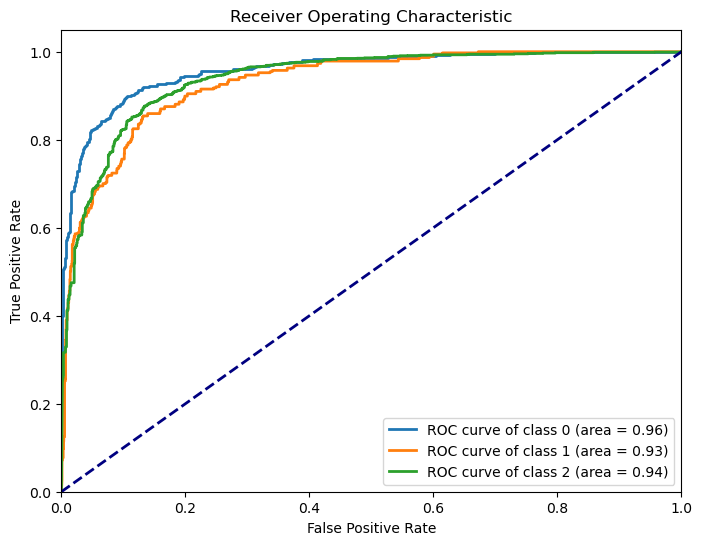

AUC scores per class: {0: 0.9579040990498088, 1: 0.9299836279872578, 2: 0.9390047136092703}


In [128]:
# Encode the string labels to integers
label_encoder = LabelEncoder()
y_test_bow_response_encoded = label_encoder.fit_transform(df['Sentiment'])

# Get predicted probabilities for the test set (assumes nb_classifier_bow_response and count_vectorizer_response are defined)
y_prob_bow_response = nb_classifier_bow_response.predict_proba(count_vectorizer_response.fit_transform(response_text))

# Calculate ROC curves and AUCs
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(nb_classifier_bow_response.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bow_response_encoded, y_prob_bow_response[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(nb_classifier_bow_response.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {} (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the AUC scores
print("AUC scores per class:", roc_auc)




### 8.3.2 Naive Bayes with BoW, TF-IDF and Additional Features

In [130]:
# Assuming df is your DataFrame loaded from 'full_dataset_sentiment_directive_responses.csv'
df['Response'] = df['Response'].fillna('')  # Handling potential NaNs
y = df['Sentiment'].values

# Prepare TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Response'])

# Prepare BoW features
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['Response'])

# Combine TF-IDF and BoW features
X_combined = hstack([X_tfidf, X_bow])

# Splitting dataset into training and testing for the combined features
X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes Classifier for the combined feature set
nb_classifier_combined = MultinomialNB()
nb_classifier_combined.fit(X_train_combined, y_train)

# Predict on the test set for the combined features
y_pred_combined = nb_classifier_combined.predict(X_test_combined)

# Print classification report for the combined features
print("Naive Bayes Classifier Performance with Combined TF-IDF and BoW Features:")
print(classification_report(y_test, y_pred_combined))

# Calculate and print the overall accuracy for the combined features
accuracy_combined = accuracy_score(y_test, y_pred_combined)
print(f"Overall Accuracy with Combined Features: {accuracy_combined:.2f}")
#combined TFIDF & BoW Naive Bayes directive and sentiment

Naive Bayes Classifier Performance with Combined TF-IDF and BoW Features:
              precision    recall  f1-score   support

    Negative       0.84      0.53      0.65       164
     Neutral       1.00      0.06      0.12        64
    Positive       0.79      0.99      0.88       475

    accuracy                           0.80       703
   macro avg       0.88      0.53      0.55       703
weighted avg       0.82      0.80      0.76       703

Overall Accuracy with Combined Features: 0.80


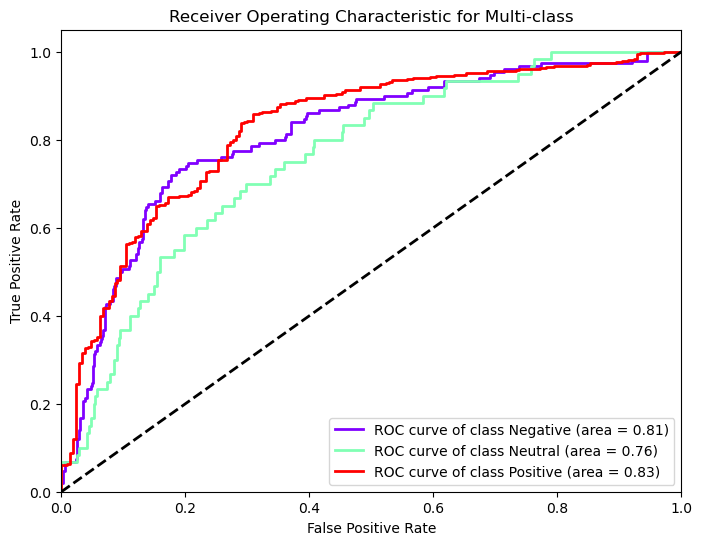

AUC for class Negative: 0.81
AUC for class Neutral: 0.76
AUC for class Positive: 0.83


In [132]:
# Assuming 'df' and 'nb_classifier_tfidf' are defined from previous Naive Bayes with TF-IDF code
# Also assuming 'X_test_tfidf' and 'y_test_tfidf' are your test features and labels

# Encode the string labels to integer values for multi-class ROC analysis
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test_tfidf)

# Get the probability scores for each class
y_prob_tfidf = nb_classifier_tfidf.predict_proba(X_test_tfidf)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(nb_classifier_tfidf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded == i, y_prob_tfidf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(nb_classifier_tfidf.classes_))))
for i, color in zip(range(len(nb_classifier_tfidf.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_encoder.inverse_transform([i])[0], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class')
plt.legend(loc="lower right")
plt.show()

# Printing the AUC scores
for i in range(len(nb_classifier_tfidf.classes_)):
    print(f"AUC for class {label_encoder.inverse_transform([i])[0]}: {roc_auc[i]:.2f}")

### 8.3.3 Naive Bayes with BoW, TF-IDF

In [136]:
# Load the data
df = pd.read_csv('full_dataset_sentiment_directive_responses-Copy1.csv')
df['Response'] = df['Response'].fillna('')

# Prepare BoW and TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Response'])

bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['Response'])

# Convert 'Yes'/'No' to binary if necessary
df['Directive'] = df['Directive'].map({'Yes': 1, 'No': 0}).astype(int) if df['Directive'].dtype == 'object' else df['Directive'].astype(int)
df['contains_advisory'] = df['contains_advisory'].map({'Yes': 1, 'No': 0}).astype(int) if df['contains_advisory'].dtype == 'object' else df['contains_advisory'].astype(int)
df['contains_affirmative'] = df['contains_affirmative'].map({'Yes': 1, 'No': 0}).astype(int) if df['contains_affirmative'].dtype == 'object' else df['contains_affirmative'].astype(int)

# Convert to sparse
additional_features = csr_matrix(df[['Directive', 'contains_advisory', 'contains_affirmative']].values)

# Combine all
X_combined = hstack([X_tfidf, X_bow, additional_features])
y = df['Sentiment'].values

# Split and train
X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
nb_classifier_combined = MultinomialNB()
nb_classifier_combined.fit(X_train_combined, y_train)

# Predict and evaluate
y_pred_combined = nb_classifier_combined.predict(X_test_combined)
print("Naive Bayes Classifier Performance with Combined TF-IDF, BoW, and Additional Features:")
print(classification_report(y_test, y_pred_combined))
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred_combined):.2f}")

Naive Bayes Classifier Performance with Combined TF-IDF, BoW, and Additional Features:
              precision    recall  f1-score   support

    Negative       0.85      0.53      0.65       164
     Neutral       1.00      0.06      0.12        64
    Positive       0.79      0.99      0.88       475

    accuracy                           0.80       703
   macro avg       0.88      0.53      0.55       703
weighted avg       0.82      0.80      0.76       703

Overall Accuracy: 0.80


## 8.4 Logistic Regression with TF-IDF

In [138]:
# Load your dataset
df = pd.read_csv('full_dataset_sentiment_directive_responses-Copy1.csv')

# Preprocess the text data
df['Response'] = df['Response'].fillna('')  # Fill NaN values with empty strings

# Vectorize the 'Response' text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Response'])
y = df['Sentiment'].values

# Split the dataset into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter if the model doesn't converge
log_reg.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_tfidf)

# Print the classification report and accuracy
print("Logistic Regression Classifier Performance with TF-IDF:")
print(classification_report(y_test, y_pred))
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.2f}")
#TFIDF Logistic Regression Directive & Sentiment

Logistic Regression Classifier Performance with TF-IDF:
              precision    recall  f1-score   support

    Negative       0.90      0.57      0.70       164
     Neutral       1.00      0.19      0.32        64
    Positive       0.80      0.99      0.88       475

    accuracy                           0.82       703
   macro avg       0.90      0.58      0.63       703
weighted avg       0.84      0.82      0.79       703

Overall Accuracy: 0.82


### 8.4.1 Logistic Regression with TF-IDF and BoW

In [140]:
# Load your dataset
df = pd.read_csv('full_dataset_sentiment_directive_responses-Copy1.csv')

# Preprocess the text data
df['Response'] = df['Response'].fillna('')  # Fill NaN values with empty strings

# Prepare TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Response'])

# Prepare BoW features
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['Response'])

# Combine TF-IDF and BoW features
X_combined = hstack([X_tfidf, X_bow])
y = df['Sentiment'].values

# Split the combined dataset into training and testing sets
X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
log_reg_combined = LogisticRegression(random_state=42, max_iter=10000)  # Increase max_iter if needed
log_reg_combined.fit(X_train_combined, y_train)

# Predict on the test set
y_pred_combined = log_reg_combined.predict(X_test_combined)

# Print the classification report and accuracy for the combined features
print("Logistic Regression Classifier Performance with Combined TF-IDF and BoW Features:")
print(classification_report(y_test, y_pred_combined))
print(f"Overall Accuracy with Combined Features: {accuracy_score(y_test, y_pred_combined):.2f}")
#TFIDF & BoW Logistic Regression Directive & Sentiment

Logistic Regression Classifier Performance with Combined TF-IDF and BoW Features:
              precision    recall  f1-score   support

    Negative       0.92      0.87      0.90       164
     Neutral       0.76      0.75      0.76        64
    Positive       0.94      0.96      0.95       475

    accuracy                           0.92       703
   macro avg       0.88      0.86      0.87       703
weighted avg       0.92      0.92      0.92       703

Overall Accuracy with Combined Features: 0.92


### 8.4.2 Logistic Regression with TF-IDF, BoW and Additional Features

In [158]:
# Function to calculate 'contains_advisory' and 'contains_affirmative'
def calculate_advisory_affirmative(response):
    contains_advisory = int('advisory' in response)
    contains_affirmative = int('affirmative' in response)
    return contains_advisory, contains_affirmative

# Load your dataset
df = pd.read_csv('full_dataset_sentiment_directive_responses-Copy1.csv')

# Preprocess the text data
df['Response'] = df['Response'].fillna('')  # Fill NaN values with empty strings

# Calculate 'contains_advisory' and 'contains_affirmative'
df['contains_advisory'], df['contains_affirmative'] = zip(*df['Response'].map(calculate_advisory_affirmative))

# Ensure 'Directive', 'contains_advisory', and 'contains_affirmative' are integers
## Normalize all 3 columns to contain only 1s and 0s
df['Directive'] = df['Directive'].astype(str).str.strip().str.capitalize().map({'Yes': 1, 'No': 0})
df['contains_advisory'] = df['contains_advisory'].astype(str).str.strip().str.capitalize().map({'Yes': 1, 'No': 0})
df['contains_affirmative'] = df['contains_affirmative'].astype(str).str.strip().str.capitalize().map({'Yes': 1, 'No': 0})

# Fill any missing or unmapped values with 0
df[['Directive', 'contains_advisory', 'contains_affirmative']] = df[['Directive', 'contains_advisory', 'contains_affirmative']].fillna(0).astype(int)



# Prepare TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Response'])

# Prepare BoW features
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['Response'])

# Convert the additional features to a sparse matrix
additional_features_sparse = csr_matrix(df[['Directive', 'contains_advisory', 'contains_affirmative']].values)

# Combine TF-IDF, BoW, and the new sparse additional features
X_combined_with_additional = hstack([X_tfidf, X_bow, additional_features_sparse])

# Split the combined dataset into training and testing sets
y = df['Sentiment'].values
X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined_with_additional, y, test_size=0.2, random_state=3508)  # Use 3508 as the random state

# Initialize and train the Logistic Regression model
log_reg_combined = LogisticRegression(random_state=3508, max_iter=10000)  # Increase max_iter if needed, using 3508 as the random state
log_reg_combined.fit(X_train_combined, y_train)

# Predict on the test set
y_pred_combined = log_reg_combined.predict(X_test_combined)

# Print the classification report and accuracy for the combined features
print("Logistic Regression Classifier Performance with Combined TF-IDF and BoW Features and Additional Features:")
print(classification_report(y_test, y_pred_combined))
print(f"Overall Accuracy with Combined Features: {accuracy_score(y_test, y_pred_combined):.2f}")


Logistic Regression Classifier Performance with Combined TF-IDF and BoW Features and Additional Features:
              precision    recall  f1-score   support

    Negative       0.89      0.88      0.89       162
     Neutral       0.93      0.76      0.83        83
    Positive       0.92      0.96      0.94       458

    accuracy                           0.92       703
   macro avg       0.91      0.87      0.89       703
weighted avg       0.92      0.92      0.91       703

Overall Accuracy with Combined Features: 0.92


## 8.5 Feature Coefficients

In [165]:
# 8.5 Feature Coefficients

# Extract feature names: TF-IDF + BoW + 'contains_advisory' and 'contains_affirmative'
feature_names = tfidf_vectorizer.get_feature_names_out().tolist() + \
                bow_vectorizer.get_feature_names_out().tolist() + \
                ['contains_advisory', 'contains_affirmative']

# Get the coefficients from the logistic regression model
coefficients = log_reg_combined.coef_[0][:-1]  # Exclude intercept to match feature names

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of the coefficients to see the most influential features
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the top features
print(coef_df.head(20))


          Feature  Coefficient
23132    negative       0.8771
25550       right      -0.8135
16295        best      -0.7577
27572      unable       0.7180
20572        hard       0.6775
22170        like      -0.6697
15708     anxiety       0.6671
27374      trauma       0.6543
23809        pain       0.6426
22313        loss       0.6322
21158   important      -0.6195
20692     helping      -0.6075
24518     problem       0.5956
20280        good      -0.5953
18059  definitely       0.5917
15880      asking      -0.5903
27314       track       0.5884
26339       space      -0.5619
28462        work      -0.5602
17784         cry       0.5556


## 8.6 Random Forest Classifier with TF-IDF

In [167]:
# Load your dataset
df = pd.read_csv('full_dataset_sentiment_directive_responses-Copy1.csv')

# Preprocess the text data
df['Response'] = df['Response'].fillna('')  # Handling potential NaN values

# Vectorize the 'Response' text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Response'])
y = df['Sentiment'].values

# Split the dataset into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Print the classification report and accuracy for the TF-IDF features
print("Random Forest Classifier Performance with TF-IDF:")
print(classification_report(y_test, y_pred_rf))
print(f"Overall Accuracy with TF-IDF: {accuracy_score(y_test, y_pred_rf):.2f}")
#Random Forest TFIDF Directive & Sentiment

Random Forest Classifier Performance with TF-IDF:
              precision    recall  f1-score   support

    Negative       1.00      0.76      0.87       164
     Neutral       1.00      0.72      0.84        64
    Positive       0.89      1.00      0.94       475

    accuracy                           0.92       703
   macro avg       0.96      0.83      0.88       703
weighted avg       0.93      0.92      0.92       703

Overall Accuracy with TF-IDF: 0.92


### 8.6.1 Random Forest Classifier with TF-IDF and BoW

In [170]:
# Load your dataset
df = pd.read_csv('full_dataset_sentiment_directive_responses-Copy1.csv')

# Preprocess the text data
df['Response'] = df['Response'].fillna('')  # Handling potential NaN values

# Prepare TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Response'])

# Prepare BoW features
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['Response'])

# Combine TF-IDF and BoW features
X_combined = hstack([X_tfidf, X_bow])
y = df['Sentiment'].values

# Split the combined dataset into training and testing sets
X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier_combined = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier_combined.fit(X_train_combined, y_train)

# Predict on the test set
y_pred_combined = rf_classifier_combined.predict(X_test_combined)

# Print the classification report and accuracy for the combined features
print("Random Forest Classifier Performance with Combined TF-IDF and BoW Features:")
print(classification_report(y_test, y_pred_combined))
print(f"Overall Accuracy with Combined Features: {accuracy_score(y_test, y_pred_combined):.2f}")
#TFIDF and BoW Directive & Sentiment

Random Forest Classifier Performance with Combined TF-IDF and BoW Features:
              precision    recall  f1-score   support

    Negative       1.00      0.76      0.86       164
     Neutral       1.00      0.72      0.84        64
    Positive       0.89      1.00      0.94       475

    accuracy                           0.92       703
   macro avg       0.96      0.82      0.88       703
weighted avg       0.93      0.92      0.91       703

Overall Accuracy with Combined Features: 0.92


### 8.6.2 Random Forest Classifier with TF-IDF, BoW Features, and Additional Features

In [175]:
# Function to calculate 'contains_advisory' and 'contains_affirmative'
def calculate_advisory_affirmative(response):
    contains_advisory = int('advisory' in response)
    contains_affirmative = int('affirmative' in response)
    return contains_advisory, contains_affirmative

# Load your dataset
df = pd.read_csv('full_dataset_sentiment_directive_responses-Copy1.csv')

# Preprocess the text data
df['Response'] = df['Response'].fillna('')  # Handling potential NaN values

# Calculate 'contains_advisory' and 'contains_affirmative'
df['contains_advisory'], df['contains_affirmative'] = zip(*df['Response'].map(calculate_advisory_affirmative))

# Convert 'Yes'/'No' or other non-numeric entries to 1/0
df['Directive'] = df['Directive'].map({'Yes': 1, 'No': 0}).fillna(df['Directive']).astype(int)
df['contains_advisory'] = df['contains_advisory'].map({'Yes': 1, 'No': 0}).fillna(df['contains_advisory']).astype(int)
df['contains_affirmative'] = df['contains_affirmative'].map({'Yes': 1, 'No': 0}).fillna(df['contains_affirmative']).astype(int)

# Prepare TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Response'])

# Prepare BoW features
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['Response'])

# Convert the additional features to a sparse matrix
additional_features_sparse = csr_matrix(df[['Directive', 'contains_advisory', 'contains_affirmative']].values)

# Combine TF-IDF, BoW, and the new sparse additional features
X_combined_with_additional = hstack([X_tfidf, X_bow, additional_features_sparse])

# Adjust the target variable for multi-label classification
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df[['Directive', 'contains_advisory', 'contains_affirmative']].values)

# Split the combined dataset into training and testing sets
X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined_with_additional, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier_combined = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier_combined.fit(X_train_combined, y_train)

# Predict on the test set
y_pred_combined = rf_classifier_combined.predict(X_test_combined)

# Convert boolean labels to string for reporting
target_names = [str(label) for label in mlb.classes_]

# Print the classification report and accuracy for the combined features
print("Random Forest Classifier Performance with Combined TF-IDF, BoW Features, and Additional Features:")
print(classification_report(y_test, y_pred_combined, target_names=target_names))
print(f"Overall Accuracy with Combined Features: {accuracy_score(y_test, y_pred_combined):.2f}")


Random Forest Classifier Performance with Combined TF-IDF, BoW Features, and Additional Features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       703
           1       0.95      0.98      0.97       370

   micro avg       0.98      0.99      0.99      1073
   macro avg       0.98      0.99      0.98      1073
weighted avg       0.98      0.99      0.99      1073
 samples avg       0.99      1.00      0.99      1073

Overall Accuracy with Combined Features: 0.96


# 9. Model Evaluations

In [259]:
# Setting display options for precision
pd.set_option('display.precision', 6)

# Compiling the model performance metrics into a DataFrame
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Naive Bayes'],
    'Accuracy': [ 0.92, 0.92, 0.90, 0.80],
    'Precision (Weighted Avg)': [ 0.92, 0.93, 0.90, 0.82],
    'Recall (Weighted Avg)': [ 0.92, 0.92, 0.90, 0.80],
    'F1 Score (Weighted Avg)': [ 0.91, 0.92, 0.90, 0.76]
}

performance_df = pd.DataFrame(data)

# Sorting the DataFrame based on Weighted Avg F1 Score for easy comparison
sorted_performance_df = performance_df.sort_values(by='F1 Score (Weighted Avg)', ascending=False)

# Displaying the sorted DataFrame
sorted_performance_df# Display
sorted_performance_df

,Model,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1 Score (Weighted Avg)
1,Random Forest,0.9200,0.9300,0.9200,0.9200
0,Logistic Regression,0.9200,0.9200,0.9200,0.9100
2,Decision Tree,0.9000,0.9000,0.9000,0.9000
3,Naive Bayes,0.8000,0.8200,0.8000,0.7600


# 10. Conclusion

In this project, we explored the use of text-based sentiment analysis and machine learning models to predict the tone of therapist responses, specifically focusing on directive, affirmative, and advisory communication. 

We first evaluated the potential of emotional sentiment (VADER compound scores) to predict directive tone, finding moderate associations. We then built and compared multiple machine learning models, including Decision Trees, Logistic Regression, and Naive Bayes classifiers, using both TF-IDF and Bag of Words text representations, enhanced with engineered linguistic features.

Our results show that combining textual features with tone indicators improves model performance across all classifiers, highlighting the value of integrating structured behavioral cues into text analysis for better understanding human communication patterns.

Future improvements could involve incorporating deep learning models or context-aware embeddings to further enhance prediction accuracy.
